# Tensorflow Homework 1
## Assignment: Multi-Layer Perceptron
### Group 22
 

<Figure size 640x480 with 0 Axes>

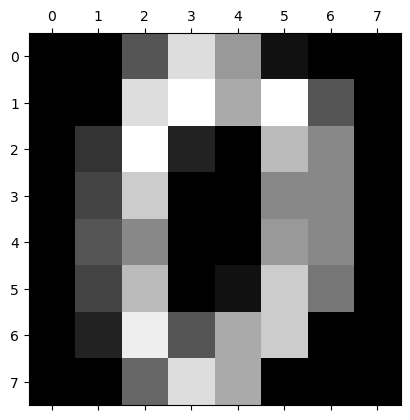

<Figure size 640x480 with 0 Axes>

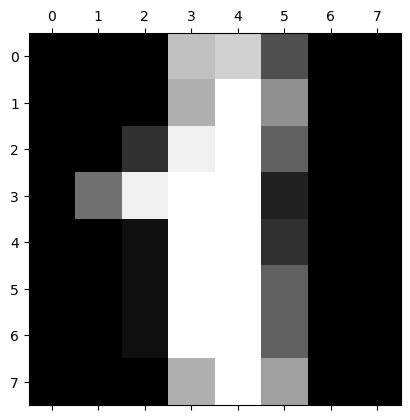

<Figure size 640x480 with 0 Axes>

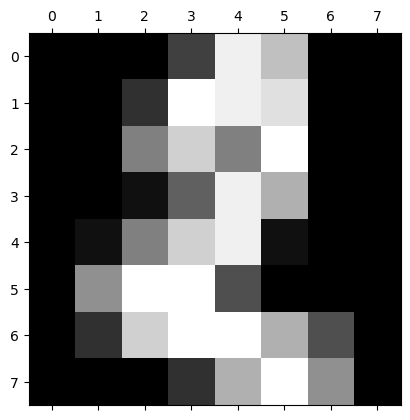

<Figure size 640x480 with 0 Axes>

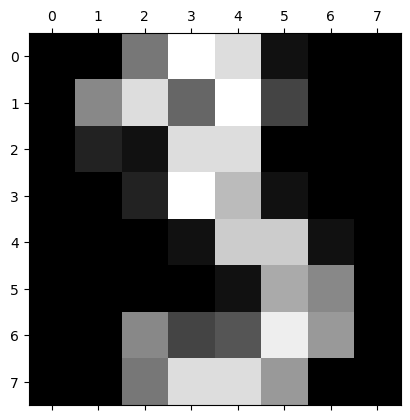

<Figure size 640x480 with 0 Axes>

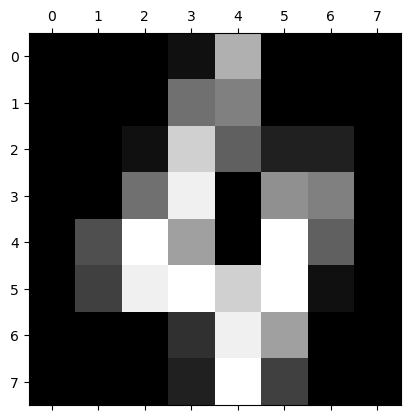

<Figure size 640x480 with 0 Axes>

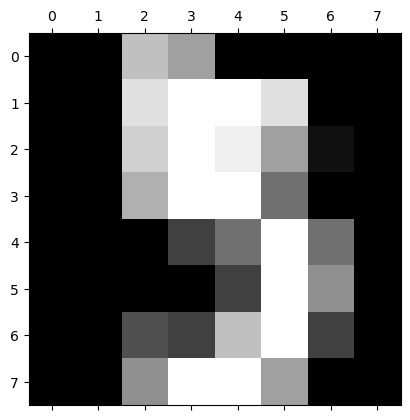

<Figure size 640x480 with 0 Axes>

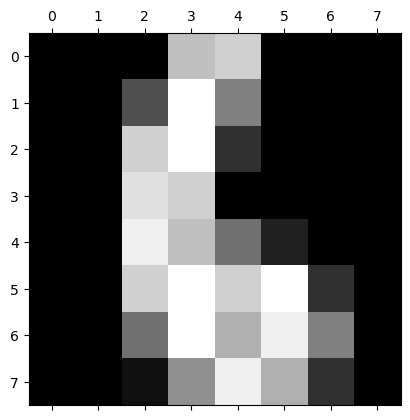

<Figure size 640x480 with 0 Axes>

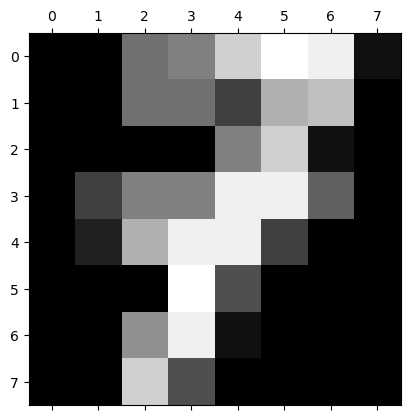

<Figure size 640x480 with 0 Axes>

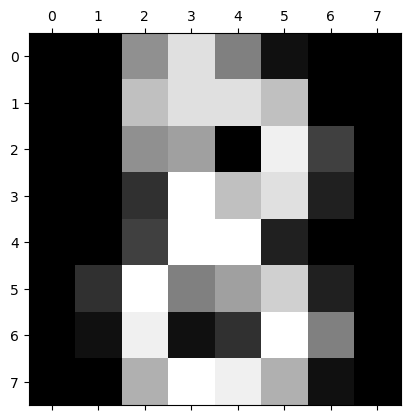

<Figure size 640x480 with 0 Axes>

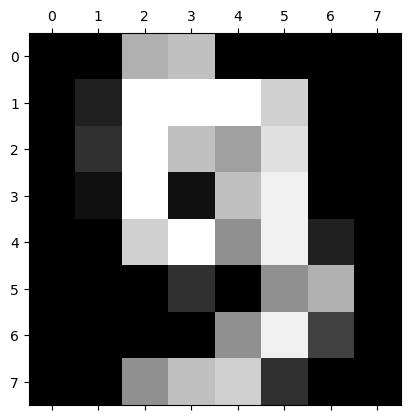

Epoch 1, Loss: 1.9522731044125887, Accuracy: 0.5165620314842578
Epoch 2, Loss: 0.8622842239294769, Accuracy: 0.8412902923538231
Epoch 3, Loss: 0.5789784580113245, Accuracy: 0.8956381184407797
Epoch 4, Loss: 0.44417636437257035, Accuracy: 0.9230931409295352
Epoch 5, Loss: 0.3660741858971232, Accuracy: 0.9346420539730135
Epoch 6, Loss: 0.31638044315588004, Accuracy: 0.9449728260869565
Epoch 7, Loss: 0.2824234016616517, Accuracy: 0.9524456521739131
Epoch 8, Loss: 0.2578016343493576, Accuracy: 0.9565217391304348
Epoch 9, Loss: 0.23907537383067295, Accuracy: 0.9599184782608695
Epoch 10, Loss: 0.22428135668886057, Accuracy: 0.9612771739130435
Epoch 11, Loss: 0.21223298274748745, Accuracy: 0.9639945652173914
Epoch 12, Loss: 0.2021763591438068, Accuracy: 0.9667119565217391
Epoch 13, Loss: 0.19361185257413757, Accuracy: 0.96875
Epoch 14, Loss: 0.18619618490799478, Accuracy: 0.9680706521739131
Epoch 15, Loss: 0.17968597395760455, Accuracy: 0.9680706521739131
Epoch 16, Loss: 0.17390379345600848, 

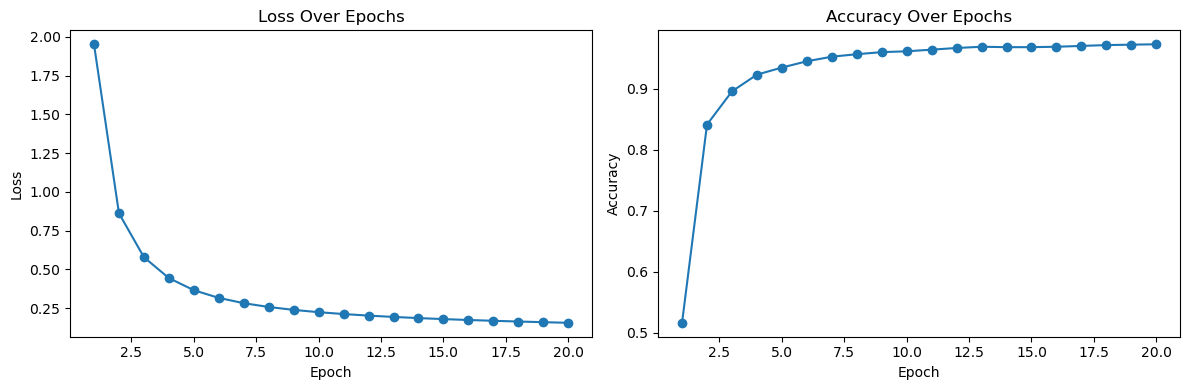

In [23]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt


# 2.1 Data
digits = load_digits()

# Extract the data into (input, target) tuples
X, y = digits.images, digits.target

data_before_normilizing = [(images,target) for images,target in zip(X, y)] # put the data into a tule


# (extra part) computes the classification accuracy between the true target labels and the predicted labels. 
def calculate_accuracy(target, pred):
    # np.argmax( , axis=1) to find the index of highest probability in the target and predicted array along the axis 1 
    correct_predictions = np.sum(np.argmax(target, axis=1) == np.argmax(pred, axis=1))  # to calculate the number of correct predictions
    
    # to calculate total number of predictions
    total_samples = target.shape[0] 
    
    # computes the accuracy by dividing number of correct predictions by the total number of samples
    accuracy = correct_predictions / total_samples
    
    # it returns a value between 0 and 1 (1 means perfect accuracy and 0 means no accuracy) 
    return accuracy



# plot data (visualize a list of images)
def plotdata(dataimages):
    for i in range(0,len(dataimages)-1):
        if i < 10: # in this case we want to print the data images from 0 to 9 (not whole data)
            plt.gray()
            plt.matshow(dataimages[i])
            plt.show()

            
# reshaping
def reshaping(data):
    reshaped = []
    for data_pair in data:
        
        # from numpy reshape function to reshape the first element of the data pair into a 1D array of length 64
        # The first element of the tuple is the reshaped image (a 1D array) and the second element is the label
        reshaped.append((np.reshape(data_pair[0], (64)), data_pair[1]))
        
    return reshaped
            
            
# makke images that represent as float32 values within either the [0 to 1] or [-1 to 1] range, if necessary rescale them respectively
def normilizing(data):
    global_min_value = np.inf  # initialize a variable to store the global minimum value as positive infinity
    global_max_value = -np.inf # initialize a variable to store the global maximum value as negative infinity
    reshaped = reshaping(data) # reshape the input data using the `reshaping` function
    
    # calculate the global minimum and maximum values for all images
    for pair in reshaped:
        local_min_value = np.min(pair[0]) # to find the minimum pixel intensity in the reshaped image
        global_min_value = np.minimum(global_min_value, local_min_value)

        local_max_value = np.max(pair[0]) # to find the maximum pixel intensity in the reshaped image
        global_max_value = np.maximum(global_max_value, local_max_value)

    #print("global min value: ", global_min_value)
    #print("global max value: ", global_max_value)
    
    # normalize all images according to the global minimum and maximum values
    normalized = []
    for pair in reshaped: 
        
        # normalize each image by subtracting the global minimum and dividing by the range (global max - global min)
        normalizedImage = (pair[0].astype(np.float32) - global_min_value) / (global_max_value - global_min_value)
        normalized.append((normalizedImage, pair[1]))

    return normalized

# normilizing data
data = normilizing(data_before_normilizing) 



# One-hot encode the target digits 
def onehot(y, number=10):
    
    # create an array of zeros with shape (number of samples in target data, number of categories)
    y_onehot = np.zeros((len(y), number))
    
    # use numpy indexing to set the one-hot encoding values
    y_onehot[np.arange(len(y)), y.astype(int)] = 1
    
    return y_onehot



X, y = zip(*data) # separate the pairs data (input, target) and implement the onehot function to encode y

X = np.array(X)  # convert x to an np array
y = np.array(y)  # convert y to an np array


# shuffle the dataset to ensure that the training process is not biased by the original order of the data
# an array of indices from 0 to the number of samples in the dataset
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X_shuffled = X[indices]
y_shuffled = y[indices] 

# split size to 80% training dataset and the rest 20% is test
train_size = int(0.8 * X.shape[0])

# Split the dataset
X_train = X_shuffled[:train_size]
y_train = y_shuffled[:train_size]
X_test = X_shuffled[train_size:]
y_test = y_shuffled[train_size:]

# apply one-hot encoding
y_train_onehot = onehot(y_train)
y_test_onehot = onehot(y_test)



# create batch generator 
# X is input data, y is target labels
def batch_generator(X, y, minibatch_size):
    
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices) # randomizes the order of data in each mini-batch during training
    
    for start in range(0, X.shape[0], minibatch_size):
        
        # This line calculates the end index of the current minibatch and 
        #it ensures that the last minibatch may be smaller if the total number of samples is not evenly divisible by minibatch_size.
        end = min(start + minibatch_size, X.shape[0]) 
        
        yield X[indices[start:end]], y[indices[start:end]]


        
# 2.2 Sigmoid Activation Function
class SigmoidActivation:
    # input = array of pre-activation vectors, where the number of elements equals the number of neurons in the current layer
    def __call__(self, batch):
        
        # lambda function takes a vector (vect) as input and computes the sigmoid activation using the formula 1 / (1 + exp(-vect))
        sigmoid = lambda vect: 1.0 / (1.0 + np.exp(-vect)) 
        
        # applies the sigmoid function to each pre-activation vector in the input batch (list comprehension to iterate over the elements of batch and computes the sigmoid for each vector
        activated_vectors = np.array([sigmoid(pre_ac_vec) for pre_ac_vec in batch])
        
        # the method returns the array of activated vectors and represent the output of the sigmoid function to the input batch
        return activated_vectors
          
        


# 2.3 Softmax activation function
class SoftmaxActivation:
    def __call__(self, batch): 
        
        # lambda function takes a vector v as input and computes the softmax activation using the formula exp(v) / sum(exp(v))
        softmax = lambda v: np.exp(v) / np.sum(np.exp(v))
        
        # applies the softmax function to each pre-activation vector in the input batch
        activated_vectors = np.array([softmax(pre_ac_vec) for pre_ac_vec in batch])
        
        #the method returns the array of activated vectors and represent the output of the softmax function to the input batch.
        return activated_vectors
    

    
# 2.4 MLP weights
class MLPLayer:
    def __init__(self, activation, input_size, num_units):
        self.activation = activation # activation function
        self.input_size = input_size # the input size (number of units in the preceding layer)
        self.num_units = num_units # the number of units (Perceptrons) in this layer
        self.weights = np.random.normal(0, 0.2, (input_size, num_units)) # weight matrix (the weights are initialized with random values drawn from a normal distribution with mean 0 and standard deviation 0.2)
        self.bias = np.zeros(num_units) # bias vector (t is initialized with zeros)
        
        
    # implement a forward function
    # computes the forward pass of the layer. Given an input x, it applies the weight matrix and bias to it and then applies the activation function
    # result is the output (activated vectors) of this layer
    def forward(self, x):
        forward_func = lambda v:  np.dot(v, self.weights) + self.bias
        weighted_vectors = np.array([forward_func(vector) for vector in x])
        activated_vectors = self.activation(weighted_vectors)
        return activated_vectors
    
    
    # This method computes the backward pass of the layer, which is used during the backpropagation algorithm
    #IT calculates the gradients of the weights (dw) and biases (db) with respect to the los
    # and it computes the delta for the previous layer (delta_prev)
    # because we are using sigmoid activation function in this code, it computes the derivative of the sigmoid activation function (input * (1 - input)) and scales it by delta_prev
    def backward(self, input, delta):
        dw = np.dot(input.T, delta) # weight gradient
        db = np.sum(delta, axis=0) # bias gradient
        delta_prev = np.dot(delta, self.weights.T) # delta for the previous layer
        
        if self.activation == SigmoidActivation:
            delta_prev *= input * (1 - input)  # derivative of sigmoid activation function
        return dw, db, delta_prev
    


# 2.6 CCE Loss function
class CCELoss:
    # calculates the cross-entropy loss between the true target values and the predicted values 
    def __call__(self, target_values, predicted_values):
        epsilon = 1e-15 # to prevent issues with taking the logarithm of zero or very small values
        
        # clips the predicted values to be within the range [epsilon, 1 - epsilon] to avoid very large or very small numbers (devided by zero)
        predicted_values = np.clip(predicted_values, epsilon, 1 - epsilon) 
        
        # loss computed as the negative sum of the true target values multiplied by the log(clipped predicted values) 
        return -np.sum(target_values * np.log(predicted_values)) / len(target_values) # to obtain the average loss(divideed by the number of samples in the batch ) 
    
    # calculates the gradient of the loss with respect to the predicted values and the true target values (target)
    def backward(self, predicted_values, true_target):
        return predicted_values - true_target
  
    
    
# 2.5 Putting together the MLP
class MLP:
    def __init__(self, layer_sizes, activation):
        self.layers = [] # created to store the layers of the neural network
        input_size = layer_sizes[0] #  the first element of layer_sizes => the size of the input layer
        
        for num_units in layer_sizes[1:]:
            layer = MLPLayer(activation, input_size, num_units)
            self.layers.append(layer)
            input_size = num_units

    # computes the activations of each layer and stores the intermediate outputs in self.outputs
    # self.outputs ==> contains the activations of all layers including the input layer and the final output layer
    # x ==> input data
    def forward(self, x):
        self.outputs = [x]
        for layer in self.layers:
            x = layer.forward(x)
            self.outputs.append(x)
        return self.outputs
    
    # backward pass (backpropagation) of the NN to update the weights
    # x ==> input data
    def backward(self, x, target_values, predected_values, learning_rate):
        loss = CCELoss()
        #computes the gradient and updates the weights and biases for each layer in # reverse order ==> starting from the output layer and moving backward through the hidden layers
        delta = loss.backward(predected_values, target_values) 
        
        # dw ==> gradient with respect to the weights
        # db ==> gradient with respect to the biases
        # delta ==> delta for the previous layer
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            x = outputs[i]  # output of the previous layer
            dw, db, delta = layer.backward(x, delta)
            layer.weights -= learning_rate * dw # updated layer's weights with gradient
            layer.bias -= learning_rate * db # updated biases with gradient 


# ploting data
plotdata(digits.images)
            
# test or training 

mlp = MLP(layer_sizes=[64, 100, 10], activation=SigmoidActivation())

# generate training batches with batch_generator function to shuffles the training data and creates mini-batches of data and labels)
train_batches = list(batch_generator(X_train, y_train_onehot, minibatch_size))

epochs = 20 # number of training epochs
minibatch_size = 64
learning_rate = 0.01

loss_function = CCELoss()  # create an instance of the CCELoss class to calculate the loss during training


# Training History 
loss_history = []
accuracy_history = []


# training loop
# in each epoch it iterates over the mini-batches of training data and labels
for epoch in range(epochs):
    total_loss = 0
    batch_count = 0
    total_accuracy = 0

    
# for each mini-batch: Forward pass ==> Compute the predicted values by passing the mini-batch through the MLP
# calculate the loss and accumulate the total loss for the epoch
# backpropagate the gradient to update the weights and biases of the MLP layers using gradient descent

    for X_batch, y_batch in train_batches:
        outputs = mlp.forward(X_batch)
        predicted_values = outputs[-1]
        
        # calculate the loss using the CCELoss instance
        batch_loss = loss_function(y_batch, predicted_values)
        total_loss += np.sum(batch_loss)  # Sum the elements of batch_loss before adding
        
        # calculate accuracy and update total accuracy
        batch_accuracy = calculate_accuracy(y_batch, predicted_values)
        total_accuracy += batch_accuracy
        
        mlp.backward(outputs, y_batch, predicted_values, learning_rate)
        batch_count += 1

    average_loss = total_loss / batch_count
    average_accuracy = total_accuracy / batch_count
    
    loss_history.append(average_loss)
    accuracy_history.append(average_accuracy)


    print(f"Epoch {epoch + 1}, Loss: {average_loss}, Accuracy: {average_accuracy}")

        
# plot training progress
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), loss_history, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), accuracy_history, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')

plt.tight_layout()
plt.show()
